# Project: Individual Planning Report

## (1)Data Description

- How data were collected: The data were collected using the AWS-EC2-based platform developed by the PLAICraft research group (1).
- Number of observations: 196
- Number of variables: 6

  **Variables:**
- "experience" is the level of experience the players identifies to: Pro, Veteran, Amateur, Regular, and Beginner (in decreasing order).
- "subscribe" is whether or not the players are subscribed to the game-related newsletter.
- "hashedEmail" is an email address that has been processed to protect the information
- "played_hours" is the time (in hours) players played (stayed logged) in the game
- "name" is the players' name provided by themselves
- "gender" is the players' gender selected by themselves
- "age" is the age (in years) of the players provided by themselves

  **Summary statistics:**
  
|      | Variables | | | | | | |
| :------- | :------------: | :-----------: | :-------------: | :--------------: | :------: | :--------: | :-----: |
| **Name** | **experience** | **subscribe** | **hashedEmail** | **played hours** | **name** | **gender** | **age** |
| **Type** | characters | logical | characters | double precision | characters | characters | double precision|
| **Mean** | -          | -         | -           | 5.845918     | -    | -      | 20.52062 |
| **#**    | Pro = 14<br>Vet = 48<br>Ama = 63<br>Regular = 36<br>Beginner = 35   | True = 144<br>False = 52 |     -      |     -        |   -  | Male = 124<br>Female = 37<br>Non-Binary = 15<br>Two-Spirited = 6<br>Agender = 2<br>Prefer not to say = 11<br>Other = 1 |    - |


- Issues in the data: The number of data might not be large enough.

(1) https://plai.cs.ubc.ca/research/minecraft-meets-ai-research-with-plai/

## (2)Questions:

### Broad Question: 
2. We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

### Specific Question:
Are male players under 30 years old more likely to spend more time playing the game compared to other demographic groups in the **players_data** dataset, thereby contributing more in-game data for collection?

The dataset includes predictor varibales (gender and age) and response varible (played_hours) we'll need for our prediction. To apply one of the predictive methods, we would have to wrangle the data by:

- Selecting only the columns of data that we are interested in (Age, gender, and played_hours)


## (3) Exploratory Data Analysis and Visualization

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [1]:
url <- "https://raw.githubusercontent.com/hy-008/dsci_project_1/refs/heads/main/data/players.csv"
player_data <- read_csv(url)


ERROR: Error in read_csv(url): could not find function "read_csv"


### 3.1 Mean

In [3]:
player_mean <- player_data |>
        summarize(played_hours = mean(played_hours),
                  age = mean(Age, na.rm = TRUE))
player_mean

played_hours,age
<dbl>,<dbl>
5.845918,20.52062


### 3.2 Visualization

`summarise()` has grouped output by 'Age', 'played_hours'. You can override
using the `.groups` argument.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


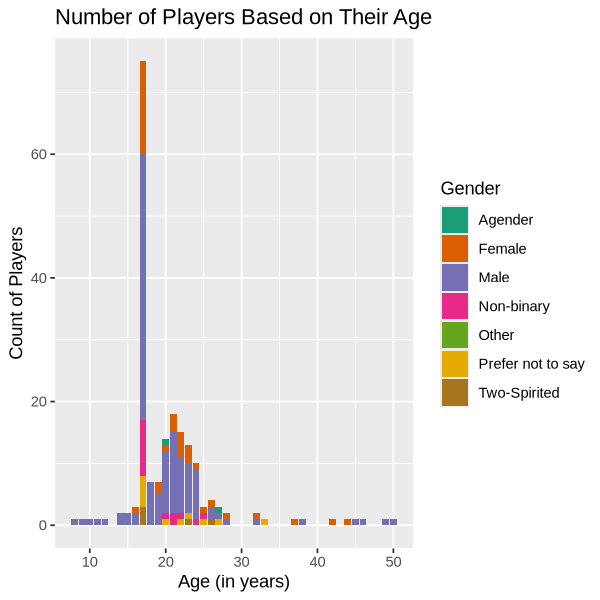

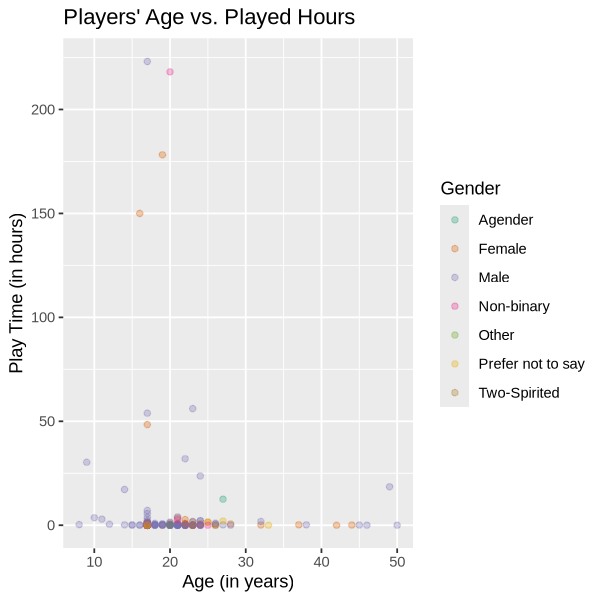

In [4]:
options(repr.plot.height = 5, repr.plot.width = 5)

age_num <- player_data |>
            group_by(Age, played_hours, gender) |>
            summarize(age_count = n())

age_chart <- age_num |>
                ggplot(aes(x = Age, y = age_count, fill = gender)) +
                geom_bar(stat = "identity") +
                labs(x = "Age (in years)", 
                     y = "Count of Players", 
                     fill = "Gender") +
                ggtitle("Number of Players Based on Their Age") +
                scale_fill_brewer(palette = 'Dark2')
age_chart

hours_chart <- player_data |>
                ggplot(aes(x = Age, y = played_hours, color = gender)) +
                geom_point(alpha = 0.3) + #there is overplotting
                labs(x = "Age (in years)", 
                     y = "Play Time (in hours)", color = "Gender") +
                ggtitle("Players' Age vs. Played Hours") +
                scale_color_brewer(palette = 'Dark2')
hours_chart

**Insights:** The visualizations reveal that the player base is predominantly young (15-25 years old), with most players logging fewer than 10 hours. 

The bar chart shows the distribution of players across different age groups. The majority of players are aged between 15 to 25, with a peak around 17-21. 

The scatter plot shows the relationship between player age and the number of hours played, where points are colored by gender. 
There is a high concentration of players aged between 15 to 25 who have played between 0 to 10 hours. This is evident from the darker points in this region of the graph and is also supported by the bar graph. We can also observe a few players have played significantly more hours, which would indicate more contribution of data. 
There are fewer data points for non-binary and other gender categories, making it harder to draw conclusions about these groups.


In [5]:
options(repr.plot.height = 10, repr.plot.width = 9)

player_data <- player_data |>
        select(Age, gender, played_hours)

player_pairplot <- player_data |> 
    ggpairs(mapping = aes(alpha = 0.4)) +
    theme(text = element_text(size = 20))

player_pairplot

ERROR: Error in ggpairs(player_data, mapping = aes(alpha = 0.4)): could not find function "ggpairs"


## (4)Methods and Plan


To predict **played_hours** using **age** and **gender**, I would use the K-nearest neighbors (K-NN) regression method. This is because K-NN regression does not assume a linear relationship between the predictors and the response variable. This is important because the relationship between these variables may not be linear as we observed in the visualizations. Some potential weakness of this method are that K-NN is sensitive to outliers and it is heavily dependent on *k*.

To process the data to apply K-nearest neighbors I will:
1. Use the `set.seed()` function to make the whole process reproducible.
2. Split the data into a training set and a testing set with a proportion of 6:4 (60% of the data for training and 40% for testing). This will happen after wrangling the original data set.
3. Specify the recipe.
4. Since we are using two predictors, use `step_scale()` and `step_center()` to standardize. 
5. Create the model.
6. Perform cross validation and create the workflow, to chain the recipe and model created above, to choose the best *k* (the number of neighbors to use for our prediction). 
7. Create a new model using the best *k* we found.
8. Create a new workflow using the new model and the same recipe.
9. Compute the prediction.
